In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

In [33]:
training_dir = "images/train/"
validation_dir = "images/validate/"
test_dir = "images/test/"
img_size = (256,256)
batch_size = 1


classes = ["Queen Elisabeth", "Kamala Harris", "Michelle Obama"]

In [23]:
train_data_generator = ImageDataGenerator(rescale= 1. / 255.)

validate_data_generator = ImageDataGenerator(rescale= 1. / 255.)

test_data_generator = ImageDataGenerator(rescale= 1. / 255.)


In [24]:
train_generator = train_data_generator.flow_from_directory(
    training_dir, 
    target_size=(256,256),
    batch_size=batch_size,
    class_mode="categorical")

validation_generator = validate_data_generator.flow_from_directory(
    validation_dir, 
    target_size=(256,256),
    batch_size=batch_size,
    class_mode="categorical")

test_generator = test_data_generator.flow_from_directory(
    test_dir, 
    target_size=(256,256),
    batch_size=batch_size,
    class_mode="categorical")

Found 210 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


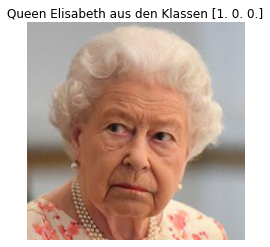

In [36]:
item = train_generator.__getitem__(1)

name = classes[np.argmax(item[1])]

plt.imshow(np.squeeze(item[0]))
plt.title(f"{name} aus den Klassen {np.squeeze(item[1])}")
plt.axis('off')
plt.show()

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

In [ ]:
num_classes = 3

model = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)